In [1]:
import numpy as np
import pandas as pd
import math
import scipy.stats as ss
from scipy.special import chdtri
import matplotlib.pyplot as plt

In [2]:
class Sardines:
    
    def __init__(self):
        self.k = int(2)
        self.alpha = float(0.1)
        self.data = pd.read_csv("sardines.csv", sep = ";")
        self.chisq, self.avg, self.std, self.chisq_alpha= 0, 0, 0, 0
        self.u, self.F, self.p, self.np, self.sqrs, self.sqrs_div = [], [], [], [], [], []
        self.dof = self.data.shape[0] - self.k - 1
        self.df = pd.DataFrame()
        
    def average(self):
        sum_avg = 0
        for i in range(self.data.shape[0]):
            x = (1 / 2) * (self.data.iloc[i, 0] + self.data.iloc[i, 1]) * self.data.iloc[i, 2]
            sum_avg += x
        self.avg = sum_avg / sum(self.data.iloc[:,2])
        print("Average:", self.avg)
        
    def sd(self):
        self.average()
        sum_avg_std = 0
        for i in range(self.data.shape[0]):
            x = math.pow(((1 / 2) * (self.data.iloc[i, 0] + self.data.iloc[i, 1]) - self.avg), 2) * self.data.iloc[i, 2]
            sum_avg_std += x
        self.std = math.sqrt(sum_avg_std / sum(self.data.iloc[:, 2]))
        print("Standard deviation:", self.std)
        
    def u_values(self):
        self.sd()
        for i in range(self.data.shape[0] - 1):
            u_val = (self.data.iloc[i, 1] - self.avg) / self.std
            self.u.append(u_val)
        self.u.append("-")
    
    def F_values(self):
        self.u_values()
        for i in range(self.data.shape[0] - 1):
            F_val = ss.norm.cdf(self.u[i], loc=0, scale=1)
            self.F.append(F_val)
        self.F.append("-")
        
    def p_values(self):
        self.F_values()
        sum = 0
        self.p.append(self.F[0])
        for i in range(1, self.data.shape[0] - 1):
            value = self.F[i] - self.F[i - 1]
            self.p.append(value)
        for i in range(self.data.shape[0] - 1):
            sum += self.p[i]
        last = 1 - sum
        self.p.append(last)
    
    def sqr_values(self):
        self.p_values()
        n = 0
        for i in range(self.data.shape[0]):
            n += self.data.iloc[i, self.data.shape[1]-1]
        for i in range(self.data.shape[0]):
            self.np.append(n * self.p[i])
        for i in range(self.data.shape[0]):
            self.sqrs.append((self.data.iloc[i, 2] - self.np[i]) ** 2)
        for i in range(self.data.shape[0]):
            self.sqrs_div.append((self.sqrs[i] / self.np[i]))
            
    def chi_sq(self):
        self.sqr_values()
        for i in range(self.data.shape[0]):
            self.chisq += self.sqrs_div[i]
        self.chisq_alpha = chdtri(self.dof,self.alpha)
    
    def make_df(self):
        self.chi_sq()
        self.df['x_i'] = self.data.iloc[:,1]
        self.df['n_i'] = self.data.iloc[:,2]
        self.df['u_i'] = self.u
        self.df['F_i'] = self.F
        self.df['p_i'] = self.p
        self.df['np_i'] = self.np
        self.df['(n_i-np_i)^2/(np_i)'] = self.sqrs_div
    
    def The_Test(self):
        print('H_0: The distribution of sardines length is normal distribution.')
        print('H_1: The distribution of sardines length is different then normal distribution.\n')
        print('Chi_sqr=', self.chisq)
        print('Level of significance:', self.alpha)
        print('Number of degrees of freedom:', self.dof)
        print('Q=(', self.chisq_alpha,', +oo)\n')
        if self.chisq > self.chisq_alpha:
            print('Chi_sqr is in the Q range.\nWe reject H_0 and accept H_1, i.e. that the distribution of sardines length is different from the normal distribution.')
        else:
            print('Chi_sqr is not in the Q range.\nWe have no reason to reject H_0, i.e. the distribution of sardines length is normal.')

In [3]:
sard = Sardines()
sard.data

,from,to,quantity
0,10,12,10
1,12,14,26
2,14,16,56
3,16,18,64
4,18,20,30
5,20,22,14


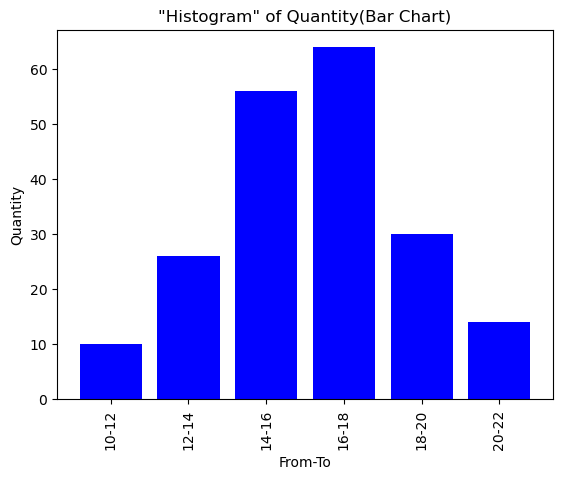

In [4]:
x_values = [(str(row['from']) + '-' + str(row['to'])) for _, row in sard.data.iterrows()]
y_values = sard.data['quantity']

plt.bar(x_values, y_values, color='blue')
plt.xlabel('From-To')
plt.ylabel('Quantity')
plt.title('"Histogram" of Quantity(Bar Chart)')
plt.xticks(rotation='vertical')
plt.show()

In [5]:
sard.make_df()
sard.df

Average: 16.2
Standard deviation: 2.4657656011875906


,x_i,n_i,u_i,F_i,p_i,np_i,(n_i-np_i)^2/(np_i)
0,12,10,-1.703325,0.044254,0.044254,8.850728,0.149234
1,14,26,-0.892218,0.186138,0.141884,28.376892,0.199092
2,16,56,-0.081111,0.467677,0.281539,56.307771,0.001682
3,18,64,0.729996,0.767304,0.299627,59.925370,0.277055
4,20,30,1.541104,0.938354,0.171050,34.210079,0.518115
5,22,14,-,-,0.061646,12.329160,0.226431


In [6]:
sard.The_Test()

H_0: The distribution of sardines length is normal distribution.
H_1: The distribution of sardines length is different then normal distribution.

Chi_sqr= 1.3716091777280024
Level of significance: 0.1
Number of degrees of freedom: 3
Q=( 6.2513886311703235 , +oo)

Chi_sqr is not in the Q range.
We have no reason to reject H_0, i.e. the distribution of sardines length is normal.
